
# How to make a good joke
A Data Report for the course NDB048 - Data Science

Assembled by Zdeněk Tomis in 2025

## Introduction

Humor is subjective, but understanding what makes a joke popular can provide valuable insights into shared preferences and trends in humor. This report focuses on analyzing user ratings of jokes to identify patterns in preferences and determine the most favored joke topics. The ultimate goal is to extract meaningful insights about humor styles that resonate with audiences and potentially lay the groundwork for a joke recommendation system.

To achieve this, we examine questions such as: Are jokes generally well received? Which jokes consistently receive the highest ratings? Which jokes to avoid - which are the lowest rated jokes? And most importantly, can we determine which joke topics are the most popular? By answering these questions, we aim to uncover trends in user humor preferences.

This report consists of several key sections, beginning with the preprocessing of data to ensure it is suitable for analysis. It follows with an exploratory analysis to identify distribution patterns and address data anomalies, such as null values and incorrect formats. Finally, it presents an investigation into the top-rated jokes, their associated topics, and the relationship between these topics and user preferences.

The analysis uses two datasets: one containing the text of 150 jokes indexed by their line numbers (used as joke IDs), and another comprising user ratings for these jokes, where each row corresponds to an individual user. The ratings range from -10.00 to +10.00, with missing ratings indicated by a specific value. 

### Questions
1. Are jokes generally well received?
2. Which jokes consistently receive the highest ratings?
3. Which jokes to avoid - which are the lowest rated jokes?
3. Can we determine which joke topics are the most popular?

### Analysis objectives motivation

In the analysis, we focused more on the jokes themselves rather than the users. We aimed to identify patterns in the jokes that receive the highest ratings and determine the most popular joke topics. By understanding the characteristics of well-received jokes, we can gain insights into humor preferences and potentially develop a joke recommendation system. Even though most of the data consists of ratings, we believe that first: the jokes themselves are the key to understanding humor preferences, and second but not least: the jokes are the most interesting part of the dataset, especially given the fact that this is an exercise.

### What is included?
This report includes:
1. Loading and preprocessing the data to ensure it is ready for analysis.
2. An exploratory analysis of ratings distributions and trends.
3. Transformation of data to handle null values and incorrect formats.
4. Category classification of jokes using GPT-4 model.
5. Analysis on the top- and worst-rated jokes and their associated topics.

### Data and Technologies
There are two file sources, spreadsheets.
The first spreadsheet contains the texts of the 150 jokes themselves.
The second spreadsheet contains the individual ratings for each user, all the ratings for one user are on one line, so we know which ratings were made by the same user.

Tools used:
- **Python** for data analysis and visualization.
- **Pandas** for data manipulation.
- **Matplotlib** for visualizations.
- **GPT-4 model o1** for joke topic classification


#### Methods
- **Data Preparation**: Handle null ratings and resolve formatting issues to ensure clean, analyzable data.
- **Visualization**: Analyze rating distributions to identify user behavior trends.
- **Feature Engineering**: Extract meaningful insights by calculating average ratings, and identifying top-performing jokes.
- **Topic Analysis**: Extract keywords from jokes, group them into topics, and evaluate topic success rates based on user ratings.

#### Key Steps
1. Load the datasets, using line numbers as joke IDs in the joke text dataset.
2. Preprocess the data by cleaning null values and converting all ratings to a consistent format.
3. Calculate average ratings for jokes and identify the top-performing ones.
4. Make a brief pause to read the best jokes, possibly also the worst, if we are curious.
5. (optional) Have a laugh at those jokes (depends on the outcome of step 4)
5. Categorize jokes into topics and assign keywords.
6. Find the best-performing categories.

#### Constraints
- **Null Ratings**: Must be replaced or excluded to avoid bias.
- **Removing outdated jokes**: Jokes that are no longer relevant or considered inappropriate should be excluded from the analysis.
- **Formatting Issues**: Improperly formatted data needs correction for accurate analysis.
- **Topic Categorization**: Automated methods may require manual adjustments due to the linguistic nature of humor - tropes and figures.


## 3. Data

### Data Source
The specific source of the data is not provided, but it is a dataset containing jokes and user ratings. The dataset is in the form of two spreadsheets: one containing the joke texts and the other containing user ratings.

In total 22 of the 150 jokes have been removed from the dataset, as they have become outdated (e.g. Bill Clinton jokes.) These are given by joke ids 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 20, 27, 31, 43, 51, 52, 61, 73, 80, 100, 116 and we will not in the analysis.

### Description
1. The joke dataset contains joke text, indexed by line number, which corresponds to the joke ID.
2. The ratings dataset contains user ratings, where ratings range from -10.00 to +10.00, with 99 representing null values.

### Data Quality
1. The ratings matrix lacks headers and contains improperly formatted values.
2. Null ratings (99) must be addressed.
3. Anomalies in formatting need resolution.

### Data Loading and Inspection
Before loading the dataset, a manual conversion from .xls to .xlsx format was performed using Microsoft Excel.

Let's inspect the dataset.


In [130]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data without headers
jokes_df = pd.read_excel('Dataset3JokeSet.xlsx', header=None, names=['Joke Text'])
ratings_df = pd.read_excel('FINAL jester 2006-15.xls', header=None)

# Set line number as Joke ID (index for jokes dataset)
jokes_df.index += 1  # Start indexing at 1 for Joke ID

# Assign column headers for ratings dataset
ratings_df.columns = ['Num Rated'] + [f'Joke {i}' for i in range(1, ratings_df.shape[1])]

# Display basic information
print("Jokes Dataset:")
jokes_df.head()
print("Ratings Dataset:")
ratings_df.head()


Jokes Dataset:
Ratings Dataset:


,Num Rated,Joke 1,Joke 2,Joke 3,Joke 4,Joke 5,Joke 6,Joke 7,Joke 8,Joke 9,...,Joke 141,Joke 142,Joke 143,Joke 144,Joke 145,Joke 146,Joke 147,Joke 148,Joke 149,Joke 150
0,62,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,34,99,99,99,99,-9.68750,99,9.93750,9.53125,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,18,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,82,99,99,99,99,6.90625,99,4.75000,-5.90625,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,27,99,99,99,99,-0.03125,99,-9.09375,-0.40625,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


We can see the structure of the data and that it was loaded correctly.


### Data Cleaning: Handling Improper Float Conversion and Null Values

The ratings dataset contains improperly formatted numerical values and null ratings. To prepare the data:
1. Convert improperly formatted numerical values to valid floats or NaN.
2. Replace null ratings (99) with proper missing value indicators for analysis.
3. Ensure all joke rating columns are numeric.
4. Remove outdated jokes by setting their ratings to NaN.


In [131]:
outdated_joke_ids = [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 20, 27, 31, 43, 51, 52, 61, 73, 80, 100, 116]

# Cleaning numerical data: Handle improper float conversion
def clean_numeric_data(df):
    for col in df.columns[1:]:  # Skip the first column (Num Rated)
        df[col] = df[col].replace([99, 99.0, "99"], None)  # Convert 99 to None
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric to NaN
        if col in outdated_joke_ids:
            df[col] = None
    return df

# Apply cleaning to the ratings dataset
ratings_df = clean_numeric_data(ratings_df)


Let's stay on the topic of data cleansing a little bit. We would now like to ensure our data is clean. This is called data quality and we can start by formulating our data quality rules:

- for ratings, all values are numeric or none
- num rated is equal to number of ratings present
- every row has at least one rating
- all ratings are between -10.0 and +10.0

We will evaluate these rules manually using Python as this is the simplest way in this scenario.



In [132]:

def data_quality_checks(df):
  # Check 1: All values are numeric or None
  all_numeric_or_none = df.iloc[:, 1:].map(lambda x: pd.isna(x) or isinstance(x, (int, float))).all().all()
  print(f" All values are numeric or None: {all_numeric_or_none}")

  # Check 2: 'Num Rated' is equal to the number of ratings present
  num_rated_correct = (df['Num Rated'] == df.iloc[:, 1:].notna().sum(axis=1)).all()
  print(f"'Num Rated' is equal to the number of ratings present: {num_rated_correct}")

  # Check 3: Every row has at least one rating
  at_least_one_rating = (df.iloc[:, 1:].notna().sum(axis=1) > 0).all()
  print(f"Every row has at least one rating: {at_least_one_rating}")

  # Check 4: All ratings are between -10.0 and +10.0
  ratings_in_range = df.iloc[:, 1:].map(lambda x: pd.isna(x) or (-10.0 <= x <= 10.0)).all().all()
  print(f"All ratings are between -10.0 and +10.0: {ratings_in_range}")
  
  if not num_rated_correct:
    incorrect_num_rated = df[df['Num Rated'] != df.iloc[:, 1:].notna().sum(axis=1)]
    print("Rows where 'Num Rated' is not equal to the number of ratings present:")
    for idx, row in incorrect_num_rated.iterrows():
      print(f"Row {idx}: 'Num Rated' = {row['Num Rated']}, Number of ratings present = {row.iloc[1:].notna().sum()}")
  
  
  if not ratings_in_range:
    out_of_range = df.iloc[:, 1:].stack().loc[lambda x: (x < -10.0) | (x > 10.0)]
    for (row, col), value in out_of_range.items():
      print(f"Out of range rating - Row: {row}, Column: {col}, Value: {value}")


# Perform data quality checks
data_quality_checks(ratings_df)

 All values are numeric or None: True
'Num Rated' is equal to the number of ratings present: False
Every row has at least one rating: True
All ratings are between -10.0 and +10.0: True
Rows where 'Num Rated' is not equal to the number of ratings present:
Row 50691: 'Num Rated' = 19.0, Number of ratings present = 17


We see there is one more issue with the data, the number of ratings does not match the number of ratings in one line. As we won't be using the number of ratings in this analysis, we can ignore this issue for now.


## 4. Exploratory Analysis

### Basic Statistics
Summary statistics help identify the overall distribution of ratings and anomalies.

### Visualizations
1. **Distribution of Ratings**: A histogram showing how users rate jokes.
2. **Average Rating per Joke**: A line plot identifying the most and least popular jokes.


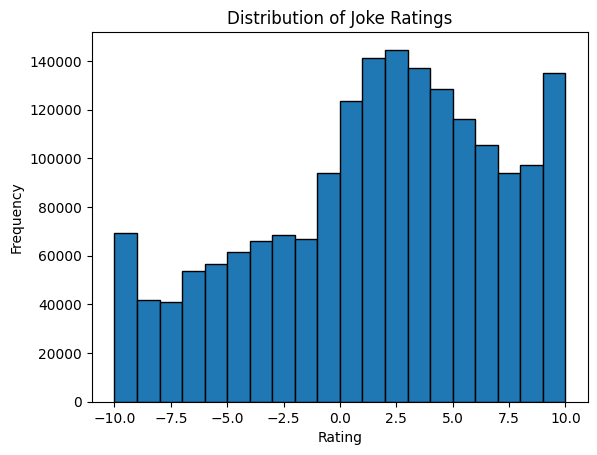

In [133]:

# Plot distribution of ratings
ratings_flat = ratings_df.iloc[:, 1:].stack()

plt.hist(ratings_flat, bins=20, edgecolor='k')
plt.title('Distribution of Joke Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


We can see that positive ratings are more common than negative ratings, meaning that jokes are generally well-received.
This means you will more often score points with a joke than not. Good to know!

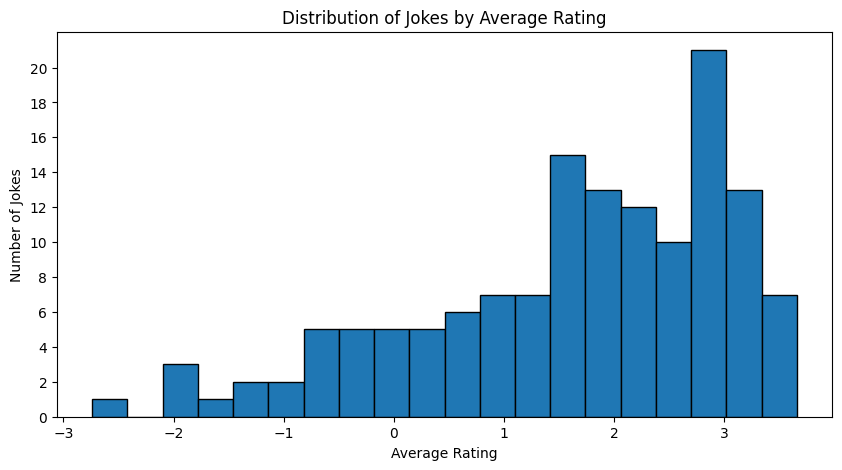

In [134]:
# Calculate average ratings for each joke
average_ratings = ratings_df.mean()
average_ratings = average_ratings.drop('Num Rated')


# Plot the distribution of jokes by their average rating
plt.figure(figsize=(10, 5))
plt.hist(average_ratings, bins=20, edgecolor='k')  # Use histogram to show distribution
plt.title('Distribution of Jokes by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Jokes')
plt.yticks(range(0, 22, 2))
plt.show()


There are far more jokes with positive average ratings than negative ones. This confirms the former observation that jokes are generally well-received.
Good news: jokes around here score way more cheers than jeers, proving they’re generally a big hit. So go ahead—fire off your best punchline. Chances are, everyone will love it!

Let's proceed now to finding out the best and the worst jokes — it's time to uncover which jokes reign supreme and which ones fall flat!

In [135]:
jokes_df['Average Rating'] = average_ratings.values

# Select the top 5 and bottom 5 jokes by average rating
top_jokes_with_ratings = jokes_df.sort_values(by='Average Rating', ascending=False).head(5).copy()
worst_jokes_with_ratings = jokes_df.sort_values(by='Average Rating').head(5).copy()

# Rename columns for consistency, and assign names
top_jokes_with_ratings.rename(columns={'Average Rating': 'Mean Rating'}, inplace=True)
top_jokes_with_ratings['Name'] = [
    "The Side-Splitter Supreme",
    "The Guffaw Grenade",
    "The Roaring Rollercoaster",
    "The Laugh Riot Launcher",
    "The Knee-Slap Knockout"
]

worst_jokes_with_ratings.rename(columns={'Average Rating': 'Mean Rating'}, inplace=True)
worst_jokes_with_ratings['Name'] = [
    "The Bore",
    "The Pain",
    "Don’t Tell This One",
    "The Snooze",
    "The Cue for Crickets"
]

def format_joke_text(text, max_width=80):
    """
    Break long joke text into shorter lines so the punchline doesn't stretch too far.
    """
    words = text.split()
    lines = []
    current_line = []
    current_length = 0

    for word in words:
        if current_length + len(word) + 1 > max_width:
            lines.append(' '.join(current_line))
            current_line = [word]
            current_length = len(word)
        else:
            current_line.append(word)
            current_length += len(word) + 1

    if current_line:
        lines.append(' '.join(current_line))
    
    return '\n'.join(lines)

endings = ["st", "nd", "rd", "th", "th"]

def print_jokes(jokes_with_ratings, qualifier):
    """
    Print jokes in a reversed order, enumerating them with a custom ranking.
    """
    for idx, joke in enumerate(jokes_with_ratings.iloc[::-1].iterrows()):
        rank = 5 - idx
        print(f"\n  {rank}. {joke[1]['Name']} "
              f"({rank}{endings[4 - idx]} {qualifier} joke, "
              f"mean rating: {joke[1]['Mean Rating']:.2f})\n")
        print("    " + format_joke_text(joke[1]['Joke Text']))

# For example, let's show the 5 worst jokes
print("5 worst jokes – a crash course in comedic caution:")
print_jokes(worst_jokes_with_ratings, "worst")


5 worst jokes – a crash course in comedic caution:

  5. The Cue for Crickets (5th worst joke, mean rating: -1.55)

    Q. What is orange and sounds like a parrot? A. A carrot.

  4. The Snooze (4th worst joke, mean rating: -1.94)

    How many feminists does it take to screw in a light bulb? That's not funny.

  3. Don’t Tell This One (3rd worst joke, mean rating: -2.00)

    Person 1: Hey, wanna hear a great knock-knock joke? Person 2: Sure, What is it?
Person 1: Okay, you start. Person 2: Knock-knock. Person 1: Who's there? Person
2: … Person 1: Hah!

  2. The Pain (2nd worst joke, mean rating: -2.03)

    Q. What's O. J. Simpson's Internet address? A. Slash, slash, backslash, slash,
slash, escape.

  1. The Bore (1st worst joke, mean rating: -2.74)

    Jack Bauer can get McDonald's breakfast after 10:30.


The conclusion here is don't make weird jokes.

In [136]:
print("Top 5 best jokes - the best of the best")

print_jokes(top_jokes_with_ratings, "best")

Top 5 best jokes - the best of the best

  5. The Knee-Slap Knockout (5th best joke, mean rating: 3.47)

    An explorer in the deepest Amazon suddenly finds himself surrounded by a
bloodthirsty group of natives. Upon surveying the situation, he says quietly to
himself, "Oh God, I'm screwed." The sky darkens and a voice booms out, "No, you
are NOT screwed. Pick up that stone at your feet and bash in the head of the
chief standing in front of you." So with the stone he bashes the life out of the
chief. Standing above the lifeless body, breathing heavily looking at 100 angry
natives... The voice booms out again, "Okay ..... NOW you're screwed."

  4. The Laugh Riot Launcher (4th best joke, mean rating: 3.48)

    A group of girlfriends is on vacation when they see a 5-story hotel with a sign
that reads: "For Women Only." Since they are without their boyfriends and
husbands, they decide to go in. The bouncer, a very attractive guy, explains to
them how it works. "We have 5 floors. Go up f

No simple conclusion is to be drawn here. It seems longer jokes can score in the top bracket. Please however don't be that person who tells long jokes at parties. Nobody likes that person.


## 5. Data Transformation and Modeling

We need to categorize jokes into topics to identify the most popular ones. We will use the GPT-4 model to classify jokes into categories based on their content. This will help us understand which topics are most popular among users.

In this report, this has been done externally and the results are provided in the dataset. 

It is also worth mentioning that this is a nondeterministic process and the results will vary greatly each time the model is run.

Each joke was assigned three topics based on content and form. The topics are represented by keywords that describe the joke's content.

For example, for the first joke (which is one of the outdated jokes - not enough ratings - not included in the analysis), the topics are: "Medical, Dark Humor, Memory/Illness". The jokes itself goes like this:

> A man visits the doctor. The doctor says "I have bad news for you. You have cancer and Alzheimer's disease".  The man replies "Well, thank God I don't have cancer!"

The categories seem like a good fit. The joke is about a medical condition, it has a dark humor twist, and it plays on the theme of memory loss.

We will now load this data and show its structure.

In [137]:
# Load the topics dataset
topics_df = pd.read_csv('topics.csv', header=None, names=["Topic 1", "Topic 2", "Topic 3"] )

# Display the first few rows of the dataset
topics_df.head()


,Topic 1,Topic 2,Topic 3
0,Medical,Dark Humor,Memory/Illness
1,Dark/Offensive,Sexual Content,Relationship
2,Music,Insult/Stereotype,One-Liner
3,Offensive,Relationship,Bathroom Humor
4,Celebrity/Crime,Wordplay,One-Liner


In [138]:
jokes_df_merged = pd.concat([jokes_df, topics_df], axis=1)

jokes_df_merged.head()

,Joke Text,Average Rating,Topic 1,Topic 2,Topic 3
1,"A man visits the doctor. The doctor says ""I ha...",NaN,Dark/Offensive,Sexual Content,Relationship
2,This couple had an excellent relationship goin...,NaN,Music,Insult/Stereotype,One-Liner
3,Q. What's 200 feet long and has 4 teeth? A. ...,NaN,Offensive,Relationship,Bathroom Humor
4,Q. What's the difference between a man and a t...,NaN,Celebrity/Crime,Wordplay,One-Liner
5,Q.\tWhat's O. J. Simpson's Internet address? ...,-2.034618,Politics,Relationship,Comeback/Insult


Our dataset just loaded perfectly—it's already giggling at its own rows, so you know everything's in the right place!

Let's calculate topic mean ratings to identify the most popular joke topics. 

Let us consider only topics for which at least two jokes are available for now. This is to ensure that the average rating is not skewed by a single joke.

In [139]:
topic_columns = ['Topic 1', 'Topic 2', 'Topic 3']
df_melted = jokes_df_merged.melt(
    id_vars=["Joke Text", "Average Rating"], 
    value_vars=topic_columns, 
    value_name="Topic"
).dropna(subset=["Topic"])



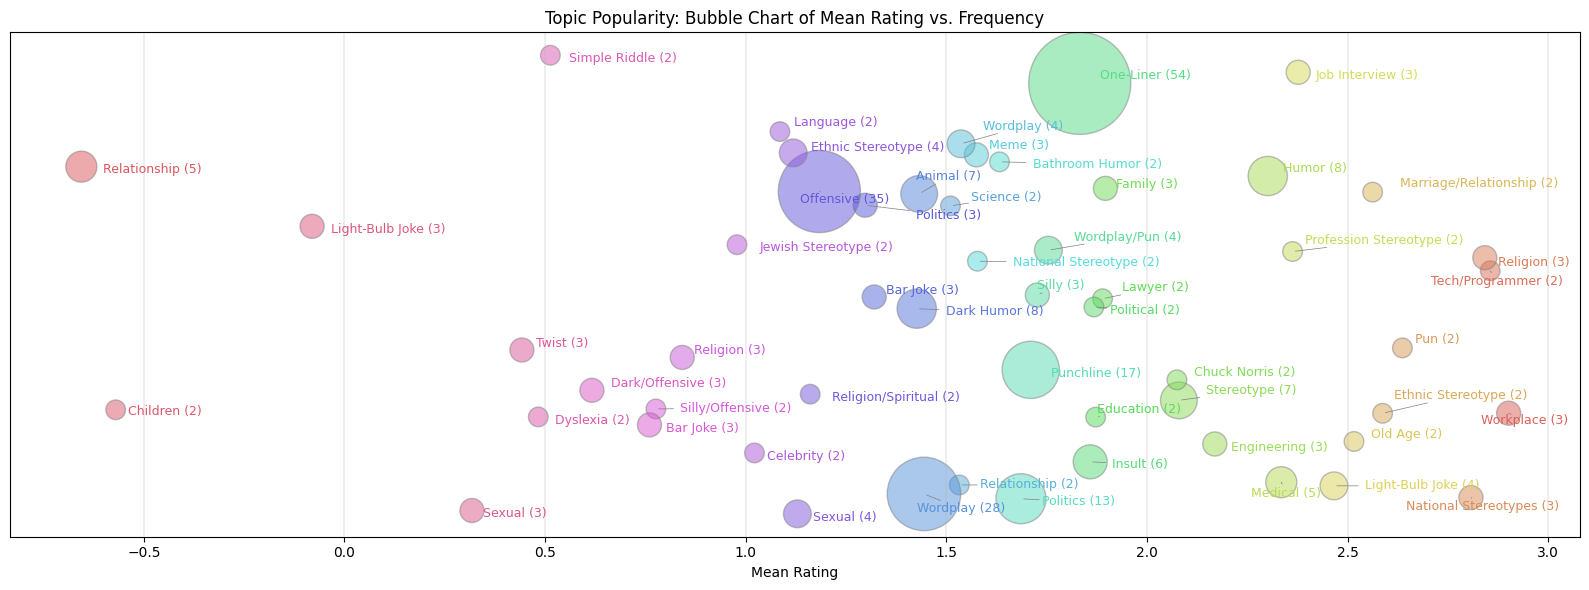

In [140]:
from adjustText import adjust_text
import numpy as np
import seaborn as sns

# 1. Group and aggregate: get mean rating and count of jokes per topic
topic_summary = df_melted.groupby("Topic").agg(
    Mean_Rating=("Average Rating", "mean"),
    Count=("Average Rating", "size")
)


# 2. Keep only topics that appear at least twice
topic_summary = topic_summary[topic_summary['Count'] >= 2]

# 3. Sort by mean rating (optional, can help with layering in the plot)
topic_summary.sort_values("Mean_Rating", ascending=False, inplace=True)

np.random.seed(16)  # For reproducibility

# 4. Create x, y, and size arrays
x = topic_summary["Mean_Rating"]
y = np.random.uniform(0, 15, size=len(topic_summary))  # or any range you prefer
sizes = topic_summary["Count"] * 100  # Multiply by 100 to adjust bubble sizes

plt.figure(figsize=(16, 6))

color_palette = sns.color_palette("hls", len(topic_summary))
topics = topic_summary.index.tolist()  
topic_to_color = {topic: color_palette[i] for i, topic in enumerate(topics)}

# Create a list of colors corresponding to each row in topic_summary
colors = [topic_to_color[topic] for topic in topics]

# Scatter plot: bubble size is proportional to frequency
plt.scatter(x, y, s=sizes, alpha=0.5, c=color_palette, edgecolors="gray")


# 5. Label each bubble with the topic name
texts = [
    plt.text(
        topic_summary.loc[topic, "Mean_Rating"]  ,  # small offset on x
        y[idx], 
        f"{topic} ({topic_summary.loc[topic, 'Count']})",
        fontsize=9,
        verticalalignment="center",
        color=topic_to_color[topic]
    )
    for idx, topic in enumerate(topic_summary.index)
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5,))

plt.xlabel("Mean Rating")
plt.yticks([])
plt.title("Topic Popularity: Bubble Chart of Mean Rating vs. Frequency")
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()


When interpreting the results of our analysis, we can categorize topics based on their average rating and frequency. A high mean rating with a high count indicates a very popular topic that appears frequently and consistently resonates with the audience. These are the crowd-pleasers—the jokes that seem to hit the mark every time. On the other hand, a high mean rating with a low count suggests a hidden gem—a well-liked topic that hasn’t been explored enough. These topics could be worth more attention, as they show potential for more engagement.

Conversely, topics with a low mean rating but high count are a warning sign. These are consistently poor-performing topics that, despite being used frequently, fail to connect with the audience. They could be stale, predictable, or simply unfunny. Lastly, low mean rating with a low count topics might just be bad luck—perhaps the few jokes in that category weren’t particularly strong. These topics might improve with better material, but they could also be inherently weak.

### Underperforming topics

Our analysis reveals that while many topics achieve good ratings, there are a few that consistently disappoint. Notably, jokes about relationships, children, and light-bulbs tend to receive below-average ratings. These categories, despite their popularity, seem to fall flat with the audience, suggesting they are either overused or lack fresh, engaging material.

The reasons why relationship, children, and light-bulb jokes perform poorly can only be hypothesized, but some patterns emerge when considering audience preferences and modern comedic trends. These topics likely suffer from predictability, overexposure, and outdated references, all of which reduce their impact.

#### Hypothesis 1: Relationship Jokes Are Too Predictable  
It’s possible that relationship jokes receive low ratings because they rely heavily on old-fashioned stereotypes about gender roles and marriage. Audiences may find jokes about nagging spouses, lazy partners, or battle-of-the-sexes themes tired and unoriginal. In a time when humor is expected to be more inclusive and creative, these jokes may feel outdated or even offensive.  

Perhaps, if relationship jokes focused more on modern dynamics—such as dating apps, miscommunication in text messages, or quirky couple habits—they would feel more relatable and less predictable. This shift in focus could reinvigorate the topic and make it resonate with a broader audience.

#### Hypothesis 2: Children Jokes Can Feel Exclusive or Mean-Spirited  
Another possibility is that jokes about children may not land well because they can feel too niche or too harsh. Parenting humor tends to appeal primarily to parents, meaning jokes about child-rearing struggles or chaotic home life might alienate people without children. Additionally, jokes that present kids as annoying or difficult can come across as mean-spirited, especially if not balanced with warmth or affection.

Alternatively, jokes that explore children’s unique perspectives or highlight their innocent misunderstandings might perform better. It’s possible that audiences prefer light-hearted, imaginative humor that captures the charm of childhood curiosity, rather than jokes that focus solely on the frustrations of parenting.

#### Hypothesis 3: Light-Bulb Jokes Are Outdated
A reasonable guess is that light-bulb jokes suffer from overuse and irrelevance. The classic setup, “How many X does it take to change a light bulb?” has been around for decades, and audiences may be too familiar with the format to find it surprising or funny. Without a clever twist, the punchline is often predictable, making it difficult to evoke a genuine laugh.

Moreover, the act of changing a light bulb is no longer a common experience in modern life. With LED lights and smart lighting systems, younger audiences may not even relate to the premise. If this hypothesis holds true, updating the concept—for example, to joke about smart home devices malfunctioning or automation fails—might make the joke feel more relevant and fresh.

### Good-Performing Topics

The best-performing topics—workplace, religion, national stereotypes, and tech/programmer jokes—stood out, but by a slim margin. Many other topics also did well, suggesting that humor resonates across a broad range of themes. These top topics likely succeeded due to their relatability and fresh perspective.

Workplace jokes perform well because work is a near-universal experience. They highlight common frustrations like office politics or annoying colleagues, which people find relatable and cathartic. This type of humor stays relevant over time, making it a reliable choice.

Religion jokes, while tricky, can land well when they strike the right balance. Thoughtful humor that gently pokes fun at traditions or highlights human behavior in religious contexts can feel clever and thought-provoking without crossing the line into offense.

Jokes about national stereotypes succeed when they playfully exaggerate cultural quirks without malice. People often appreciate light-hearted jabs at their own customs when delivered in a respectful, self-aware manner.

Tech and programmer jokes perform well because they reflect modern experiences. As technology shapes our daily lives, humor about smart devices, automation, or software quirks resonates with a wide audience, even those outside the tech industry.

Overall, these high-performing topics share traits like relatability, clever observations, and balanced tone. Many other topics scored similarly well, indicating that success is more about how the joke is crafted than the theme itself.

### Side Note 

As we have outlined in the introduction, we have focused more on the jokes themselves rather than the users. We aimed to identify patterns in the jokes that receive the highest ratings and determine the most popular joke topics. This decision has it good reasons. However, this cuts the size of the dataset to such dimensions, that fitting a machine learning algorithm here would make little sense. The dataset is simply too small for that. For this reason the analysis is based on descriptive statistics and visualizations, which makes it no less interesting (on the contrary, we believe).



## 7. Summary

In conclusion, the results show that jokes are generally well-received, with many topics achieving high ratings. Humor, when used appropriately, can be a powerful tool for building connections and making friends. A well-timed joke can ease tension, spark conversation, and create lasting bonds. However, jokes must be used wisely, as humor is situational and context matters greatly.

While workplace or tech jokes may go over well in casual settings, making certain jokes in inappropriate situations can backfire. For instance, national stereotype jokes in a diverse group could unintentionally offend someone. Similarly, religion jokes might be unsuitable in formal settings where people hold their beliefs deeply. And some jokes, regardless of topic, are simply out of place in environments like schools, where humor needs to remain inclusive and respectful.

For example, cracking a light-bulb joke during a serious class discussion could disrupt the flow and seem immature. Likewise, relationship or children jokes might not land well in professional environments, where people expect neutral and respectful conversation.

Ultimately, timing and audience are key. Jokes can help make friends and lighten the mood, but they can also create awkward or uncomfortable moments if used carelessly. It's important to read the room and know your audience before delivering a punchline. A good joke makes people laugh and feel included—not uncomfortable.


### Key Findings
1. Jokes are generally well-received, with positive ratings outnumbering negative ones.
2. Workplace, religion, national stereotypes, and tech/programmer jokes are among the top-performing topics.
3. Relationship, children, and light-bulb jokes tend to receive below-average ratings and may need fresh material or a new approach.

## 8. How to reproduce this analysis

To reproduce this analysis, you can follow these steps:

Download the dataset linked on the course website, convert the datasets to xslx. Then run this jupyter notebook. You will need to install libraries, their specific versions are listed in the pip requirements file provided with this report.

```bash
pip install -r requirements.txt
```